#Реализовать решение задачи классификации пользовательских данных с использованием деревьев решений. Сравнить с ранее применявшимися методами.



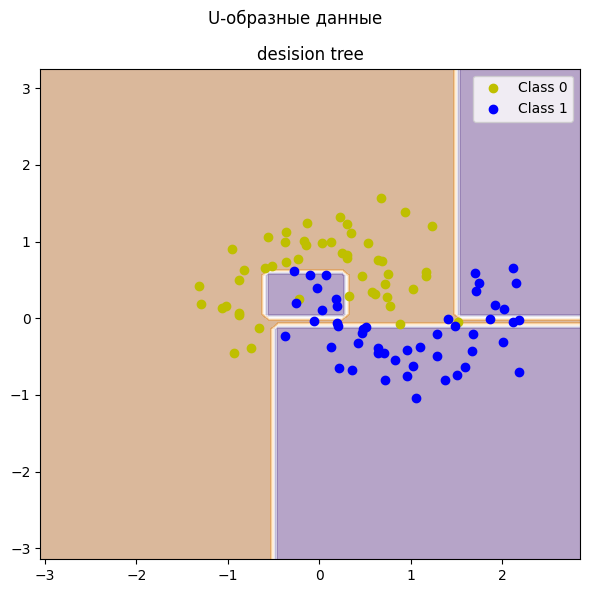

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
# Генерируем два облака точек
np.random.seed(0)
n = 100
X, y =  datasets.make_moons(n_samples=n, noise=0.3) # Генерирует два облака точек (X и y) с использованием функции make_moons


# Приводим данные к нулевому среднему и единичному стандартному отклонению
scaler = StandardScaler() # Производим стандартизацию данных с помощью объекта StandardScaler
X_scaled = scaler.fit_transform(X)

# Создает экземпляры классификаторов K-Nearest Neighbors (KNN) с разными значениями числа соседей
knn1 = DecisionTreeClassifier()
#radius_norm = RadiusNeighborsClassifier(radius=2, outlier_label="most_frequent")
#radius_big = RadiusNeighborsClassifier(radius=4, outlier_label="most_frequent")
#weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Обучает каждую из моделей (KNN и Radius Neighbors)
knn1.fit(X_scaled, y)
#radius_norm.fit(X_scaled, y)
#radius_big.fit(X_scaled, y)
#weighted.fit(X_scaled, y)

# Вычисляем предсказания для всех точек в пространстве, используя сетку xx и yy.
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z_knn1 = knn1.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn1 = Z_knn1.reshape(xx.shape)


# Визуализируем данные и границы классов
plt.figure(figsize=(6, 6))
plt.suptitle("U-образные данные")

plt.subplot(1, 1, 1)
plt.contourf(xx, yy, Z_knn1, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('desision tree') # количество соседей = 1
plt.legend()

plt.tight_layout()

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
data = pd.read_csv("cwurData.csv")
data

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


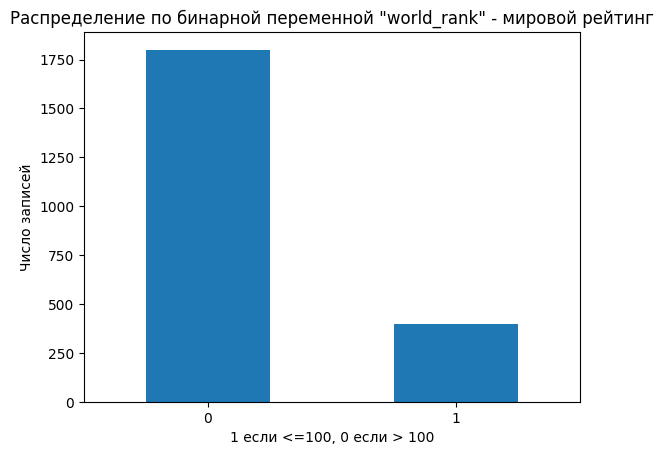

In [ ]:
# бинаризация: создание бинарной переменной на основе условия
data['is_top_ranked'] = (data['world_rank'] <= 100).astype(int)
data['is_top_ranked'].value_counts().plot(kind='bar')
plt.title('Распределение по бинарной переменной "world_rank" - мировой рейтинг')
plt.xlabel('1 если <=100, 0 если > 100')
plt.ylabel('Число записей')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Выделяем столбец по которому будем предсказывать
y = data['is_top_ranked']
X = data
# Удаляем столбец, по которому будут идти предсказания
X = X.drop('is_top_ranked', axis=1)
X = X.drop('institution', axis=1)
X = X.drop('country', axis = 1)
X = X.drop('broad_impact', axis = 1)

#разделили данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
# X_train - Это матрица признаков (независимых переменных) из обучающей выборки.
#В этой матрице содержатся признаки, которые будут использоваться для обучения модели.

# X_test - Это матрица признаков из тестовой выборки. В этой матрице содержатся признаки,
# которые будут использоваться для проверки производительности модели.

# y_train - Это вектор целевой переменной (зависимой переменной) для обучающей выборки.
# Он содержит фактические значения, которые модель пытается предсказать.

# y_test - Это вектор целевой переменной для тестовой выборки. Он также содержит фактические значения,
# которые будут использоваться для проверки того, насколько хорошо модель способна предсказывать целевую переменную.
X

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,1,7,9,1,1,1,1,5,100.00,2012
1,2,2,9,17,3,12,4,4,1,91.67,2012
2,3,3,17,11,5,4,2,2,15,89.50,2012
3,4,1,10,24,4,16,16,11,50,86.17,2012
4,5,4,2,29,7,37,22,22,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...
2195,996,7,367,567,218,926,845,812,816,44.03,2015
2196,997,4,236,566,218,997,908,645,871,44.03,2015
2197,998,18,367,549,218,830,823,812,824,44.03,2015
2198,999,40,367,567,218,886,974,812,651,44.02,2015


In [ ]:
from sklearn.preprocessing import StandardScaler

# X_train - обучающий набор данных
# X_test - тестовый набор данных, который будет стандартизирован на основе статистики, вычисленной для X_train
#
sc_x = StandardScaler()
#sc_x.transform(X_test) - метод transform использует статистику, вычисленную на этапе обучения (на основе X_train),
# чтобы стандартизировать X_test
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
# Таким образом, X_test будет иметь те же стандартизированные признаки, что и X_train,
# что обеспечивает согласованные шкалы признаков между обучающим и тестовым наборами данных.
print (X_test[0:10, :])

[[-1.22011324 -0.69778124 -1.40559307 -1.36145285 -1.43795384 -1.16585499
  -1.1685805  -1.23353787 -1.36746406 -0.2751255  -1.69578226]
 [ 1.7384176   0.77361175  0.76108632  1.11608707  0.62168426  1.33371741
   1.76368859  1.52131144  0.87873668 -0.49020841  0.89711457]
 [ 1.18020424 -0.16807977  0.66334138  0.64290885  0.49779625  1.16201626
   1.62201716  0.75418605  0.18452254 -0.43166513 -0.39933384]
 [-1.05921645 -0.75663696  0.19090753 -1.52095113  0.62168426 -1.30453669
  -0.88853233 -1.0332539   1.01685258  0.18049392  0.89711457]
 [ 1.4527437  -0.71739982  0.66334138  0.64290885  0.49779625  0.85493537
   1.19370819  0.75418605  1.11498757 -0.44566461 -0.39933384]
 [-1.23981489  0.16543598 -1.73955493 -1.63259993 -0.95788782 -1.1295336
  -1.15869645 -1.28644307 -1.28750222  0.65774889 -0.39933384]
 [ 1.13751733 -0.24655406  0.66334138 -0.62244416  0.49779625  1.75966832
   1.529766    1.47596412  1.11498757 -0.42784709 -0.39933384]
 [ 0.37243666  0.04772454 -0.11047268  0.0

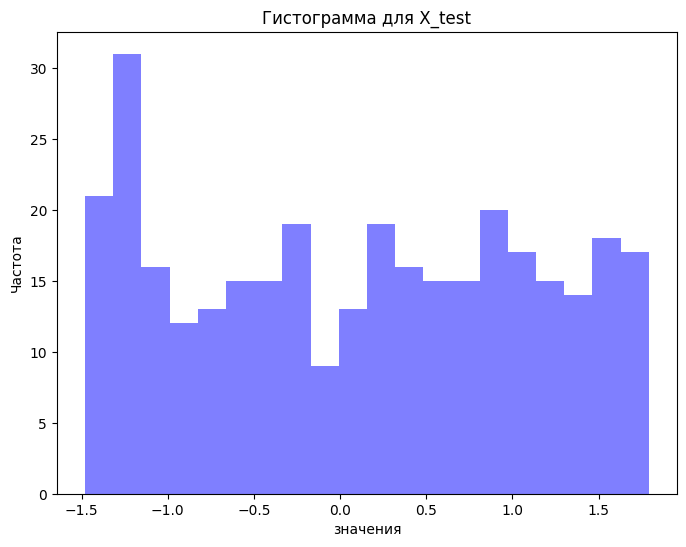

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram for the first column of X_test (change the column index as needed)
plt.figure(figsize=(8, 6))
plt.hist(X_test[:, 0], bins=20, alpha=0.5, color='blue')
plt.xlabel('значения')
plt.ylabel('Частота')
plt.title('Гистограмма для X_test')
plt.show()

In [ ]:
# Обучение модели
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, max_iter = 1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

Confusion Matrix : 
 [[277   3]
 [  1  49]]


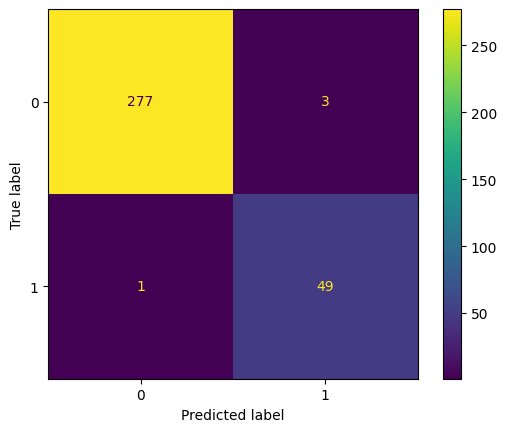

In [ ]:
#После обучения модели пришло время использовать ее для прогнозирования данных тестирования.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)


#cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Построенный график представляет собой матрицу ошибок (Confusion Matrix) или таблицу сопряженности,
# которая используется для оценки качества работы модели классификации. Она помогает визуализировать,
# насколько модель правильно или неправильно классифицировала объекты в задаче бинарной классификации.
# 277 -предсказали положительную метку и угадали
# 1 - предсказали положит метку и ошиблись
# 3 - предсказал отрицат. метку и ошиблись
# 49- предсказали отриц. метку и угадали

In [ ]:
#accuracy_score вычисляет точность
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))
# Она измеряет долю правильных предсказаний модели среди всех предсказаний. В других словах,
# это показывает, насколько точно модель классифицирует объекты.

Accuracy :  0.9878787878787879


In [ ]:
#precision_score вычисляет коэффициент точности
from sklearn.metrics import precision_score
print ("Presision : ", precision_score(y_test, y_pred))
# Результат, который выводится как "Presision," представляет собой долю объектов, правильно классифицированных как положительные,
# относительно всех объектов, которые модель предсказала как положительные. Более высокое значение коэффициента
# точности указывает на более точное выявление положительных случаев моделью.

Presision :  0.9423076923076923


In [ ]:
# Recall рассчитывается как отношение числа Positive выборок, корректно классифицированных как Positive
from sklearn.metrics import recall_score
print ("recall_score : ", recall_score(y_test, y_pred))
# это метрика, используемая для оценки качества классификационных моделей, особенно в задачах бинарной классификации.

recall_score :  0.98


In [ ]:
# Обучение модели DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=0) #  max_depthint, default=None - глубна дерева, параметры для улучшения
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Confusion Matrix : 
 [[280   0]
 [  0  50]]


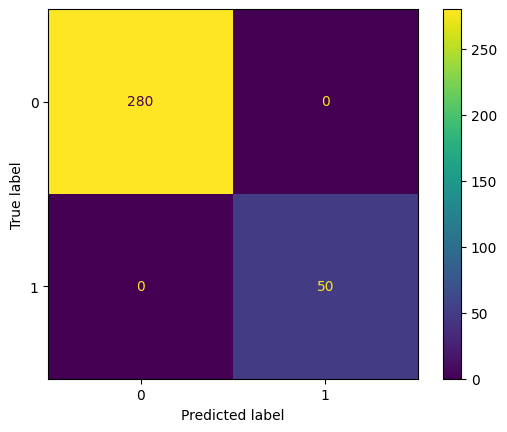

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)


#cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
#accuracy_score вычисляет точность
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))
# Она измеряет долю правильных предсказаний модели среди всех предсказаний. В других словах,
# это показывает, насколько точно модель классифицирует объекты.

Accuracy :  1.0


#Реализовать решение задачи регрессии для пользовательских данных с использованием деревьев решений. Сравнить с ранее применявшимися методами.



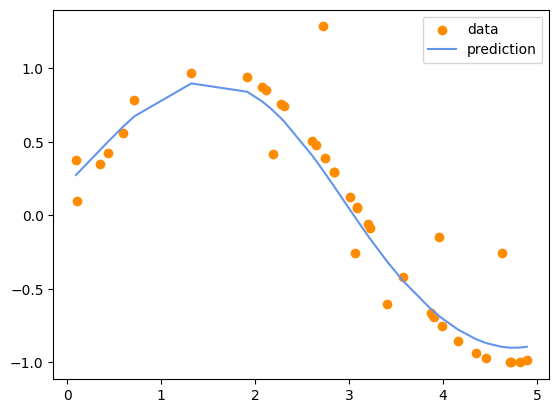

In [ ]:
# Регрессионная версия метода опорных векторов (Support Vector Regression)
# RBF kernel
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 2 * (0.5 - np.random.rand(8))

#Параметры : kernel（ядро）， degreeint（степень） int, по умолчанию = 3
# Степень полиномиальной ядерной функции («поли»). Должно быть неотрицательным. Игнорируется всеми остальными ядрами.
svr = SVR(kernel='rbf')

svr.fit(X, y)
y_pred = svr.predict(X)

plt.scatter(X, y, color='darkorange',
            label='data')
plt.plot(X, y_pred, color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:
print("R-squared:", svr.score(X,y))
print("MSE:", mean_squared_error(y, y_pred))

R-squared: 0.8772460657793272
MSE: 0.05410327366515603


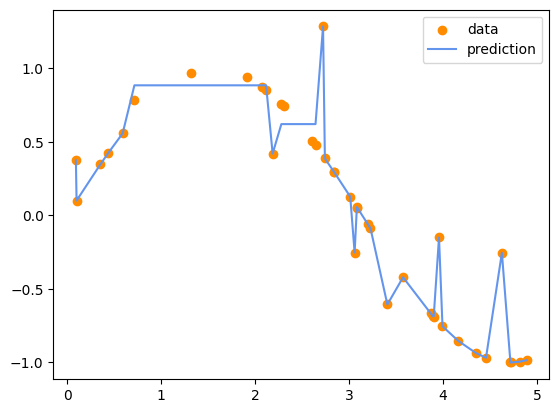

In [ ]:
from sklearn.tree import DecisionTreeRegressor
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 2 * (0.5 - np.random.rand(8))

svr = DecisionTreeRegressor(random_state=0, max_depth = 7 )# max_deoth - глубина-количество слоев дерева,
# max_leaf- количество листов(узлов), которые больше не делятся,
#min_samples_leaf - группа по элементам, берет их и строит среднее min_samples_leaf = 5 - сглаивает

svr.fit(X, y)
y_pred = svr.predict(X)

plt.scatter(X, y, color='darkorange',
            label='data')
plt.plot(X, y_pred, color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

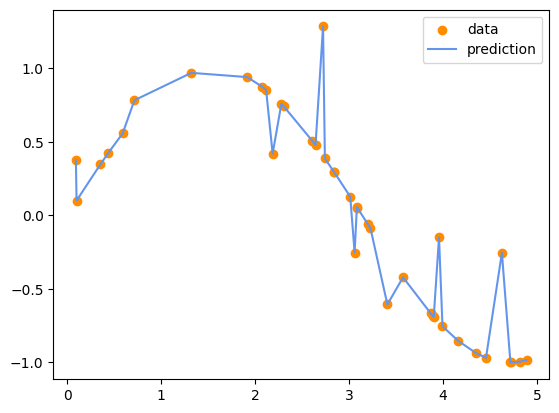

In [ ]:
from sklearn.tree import DecisionTreeRegressor
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 2 * (0.5 - np.random.rand(8))

svr = DecisionTreeRegressor(random_state=0) # по умолчанию глубины дерева нету

svr.fit(X, y)
y_pred = svr.predict(X)

plt.scatter(X, y, color='darkorange',
            label='data')
plt.plot(X, y_pred, color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

#Теперь возьму свои данные: университеты


In [ ]:
data = pd.read_csv("cwurData.csv")

In [ ]:
data = data.drop("institution", axis = 1)
data = data.drop("country", axis=1)
data = data.drop("broad_impact", axis = 1)
data.head(10)

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,1,7,9,1,1,1,1,5,100.00,2012
1,2,2,9,17,3,12,4,4,1,91.67,2012
2,3,3,17,11,5,4,2,2,15,89.50,2012
3,4,1,10,24,4,16,16,11,50,86.17,2012
4,5,4,2,29,7,37,22,22,18,85.21,2012
5,6,5,8,14,2,53,33,26,101,82.50,2012
6,7,2,13,28,9,15,13,19,26,82.34,2012
7,8,6,14,31,12,14,6,15,66,79.14,2012
8,9,7,23,21,10,13,12,14,5,78.86,2012
9,10,8,16,52,6,6,5,3,16,78.55,2012


In [ ]:
y_test = data["quality_of_education"]
X_test = data.drop("quality_of_education", axis=1)

data = data.dropna(subset=['quality_of_education'])
X_train = data.drop("quality_of_education", axis=1)
#X_train = X_train.drop("is_top_ranked", axis=1)
y_train = data["quality_of_education"]

X_train

,world_rank,national_rank,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,1,9,1,1,1,1,5,100.00,2012
1,2,2,17,3,12,4,4,1,91.67,2012
2,3,3,11,5,4,2,2,15,89.50,2012
3,4,1,24,4,16,16,11,50,86.17,2012
4,5,4,29,7,37,22,22,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...
2195,996,7,567,218,926,845,812,816,44.03,2015
2196,997,4,566,218,997,908,645,871,44.03,2015
2197,998,18,549,218,830,823,812,824,44.03,2015
2198,999,40,567,218,886,974,812,651,44.02,2015


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(y_train)
#reg.coef_ # так, как есть признок, который идеально скоррер

0         7
1         9
2        17
3        10
4         2
       ... 
2195    367
2196    236
2197    367
2198    367
2199    367
Name: quality_of_education, Length: 2200, dtype: int64


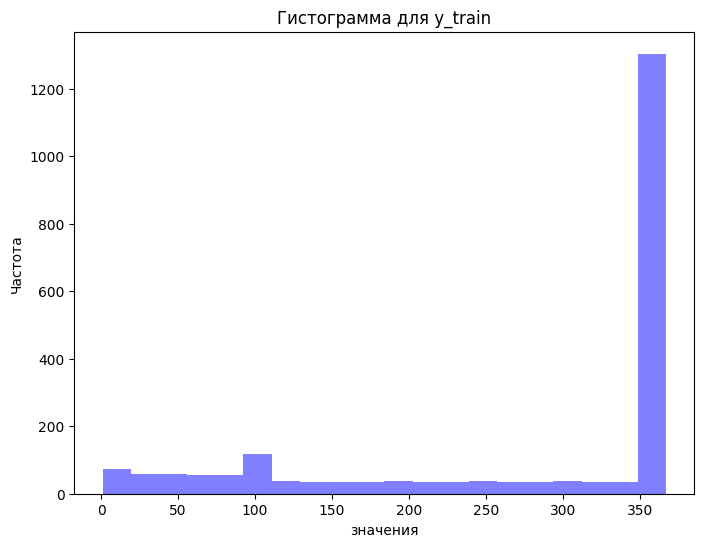

In [ ]:
# Create a histogram for the first column of X_test (change the column index as needed)
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=20, alpha=0.5, color='blue')
plt.xlabel('значения')
plt.ylabel('Частота')
plt.title('Гистограмма для y_train')
plt.show()

In [ ]:
# MSE
# m_test - y_true, reg.predict(N_test) - y_pred
from sklearn.metrics import mean_squared_error #средний квадрат ошибки Задание 5
mean_squared_error(y_test,reg.predict(X_test))
#средний квадрат ошибки

4770.200530171819

In [ ]:
from sklearn.metrics import r2_score # стандартный коэффициент детерминации для выбора модели
r2_score(y_test, reg.predict(X_test))

#Значение R² (коэффициент детерминации) равное 0.6793673976747933 указывает на то,
#что модель объясняет примерно 64.94% вариации в целевой переменной на тестовом наборе данных.
#Значение R² в диапазоне от 0 до 1 позволяет судить о том,
#насколько хорошо модель подходит для предсказания целевой переменной.


0.6790210071912084

In [ ]:
import math #RMSE квадрат MSE реальная ошибка по предсказаному
math.sqrt(mean_squared_error(y_test,reg.predict(X_test))) #насколько точно предсказываю пропуски
# Корень из среднеквадратичной ошибки (RMSE) - это метрика, которая измеряет среднюю абсолютную ошибку между
#фактическими и предсказанными значениями целевой переменной.Она предоставляет информацию о том, насколько
#точно модель делает прогнозы.

# модель в среднем ошибается на приблизительно 71.7 единицу в прогнозах по сравнению с фактическими значениями целевой переменной
# чем меньше RMSE, тем лучше

69.06663832974513

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
print(y_train)

0         7
1         9
2        17
3        10
4         2
       ... 
2195    367
2196    236
2197    367
2198    367
2199    367
Name: quality_of_education, Length: 2200, dtype: int64


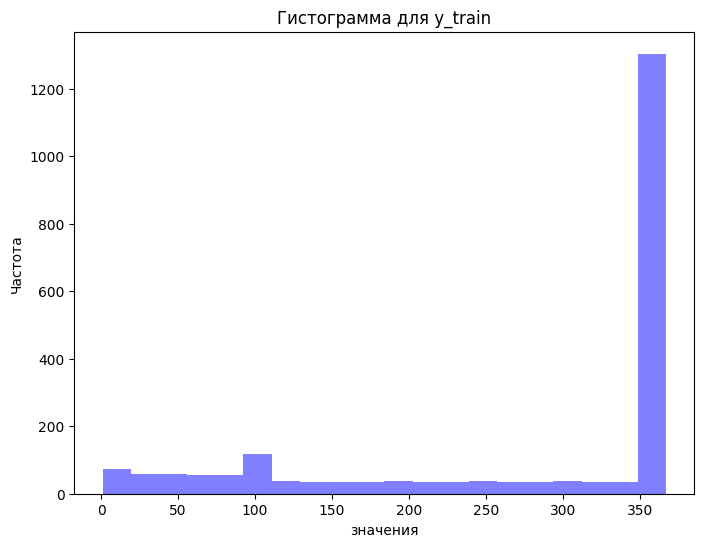

In [ ]:
# Create a histogram for the first column of X_test (change the column index as needed)
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=20, alpha=0.5, color='blue')
plt.xlabel('значения')
plt.ylabel('Частота')
plt.title('Гистограмма для y_train')
plt.show()

In [ ]:
# MSE
# m_test - y_true, reg.predict(N_test) - y_pred
from sklearn.metrics import mean_squared_error #средний квадрат ошибки
print("MSE =", mean_squared_error(y_test,reg.predict(X_test)))
#средний квадрат ошибки
from sklearn.metrics import r2_score # стандартный коэффициент детерминации для выбора модели
print("r2_score =",r2_score(y_test, reg.predict(X_test)))

MSE = 0.0
r2_score = 1.0


# Реализовать решение задачи заполнения пропусков с использованием деревьев решений. Сравнить с ранее применявшимися методами.

In [ ]:
data = pd.read_csv("cwurData.csv")

In [ ]:
data = data.drop("institution", axis = 1)
data = data.drop("country", axis=1)
data = data.drop("broad_impact", axis = 1)
data

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,1,7,9,1,1,1,1,5,100.00,2012
1,2,2,9,17,3,12,4,4,1,91.67,2012
2,3,3,17,11,5,4,2,2,15,89.50,2012
3,4,1,10,24,4,16,16,11,50,86.17,2012
4,5,4,2,29,7,37,22,22,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...
2195,996,7,367,567,218,926,845,812,816,44.03,2015
2196,997,4,236,566,218,997,908,645,871,44.03,2015
2197,998,18,367,549,218,830,823,812,824,44.03,2015
2198,999,40,367,567,218,886,974,812,651,44.02,2015


In [ ]:
# Задаем случайное сидирование для воспроизводимости
np.random.seed(0)

# Выбираем случайные индексы значений для замены
num_rows = data.shape[0]
num_to_replace = int(num_rows * 0.2) # Заменяем 20% значений
replace_indices = np.random.choice(range(num_rows), size=num_to_replace, replace=False)
#to_remove = np.array([2036, 4276])
#replace_indices = np.delete(replace_indices, np.where(np.isin(replace_indices, to_remove)))
print(len(replace_indices))
# Заменяем значения на пропуски
data_test = data.copy()
#print(data_test)
data_test = data.loc[replace_indices,:]
#print(data_test)
data.loc[replace_indices, 'quality_of_education'] = np.nan

data

440


,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,1,7.0,9,1,1,1,1,5,100.00,2012
1,2,2,NaN,17,3,12,4,4,1,91.67,2012
2,3,3,17.0,11,5,4,2,2,15,89.50,2012
3,4,1,10.0,24,4,16,16,11,50,86.17,2012
4,5,4,2.0,29,7,37,22,22,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...
2195,996,7,NaN,567,218,926,845,812,816,44.03,2015
2196,997,4,NaN,566,218,997,908,645,871,44.03,2015
2197,998,18,NaN,549,218,830,823,812,824,44.03,2015
2198,999,40,367.0,567,218,886,974,812,651,44.02,2015


In [ ]:
y_test = data_test["quality_of_education"]
X_test = data_test.drop("quality_of_education", axis=1)

data_train = data.dropna(subset=['quality_of_education'])
X_train = data_train.drop("quality_of_education", axis=1)
#X_train = X_train.drop("is_top_ranked", axis=1)
y_train = data_train["quality_of_education"]

X_train


,world_rank,national_rank,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,1,9,1,1,1,1,5,100.00,2012
2,3,3,11,5,4,2,2,15,89.50,2012
3,4,1,24,4,16,16,11,50,86.17,2012
4,5,4,29,7,37,22,22,18,85.21,2012
5,6,5,14,2,53,33,26,101,82.50,2012
...,...,...,...,...,...,...,...,...,...,...
2192,993,82,327,218,937,962,812,861,44.03,2015
2193,994,33,567,218,811,969,511,756,44.03,2015
2194,995,4,449,218,595,430,645,839,44.03,2015
2198,999,40,567,218,886,974,812,651,44.02,2015


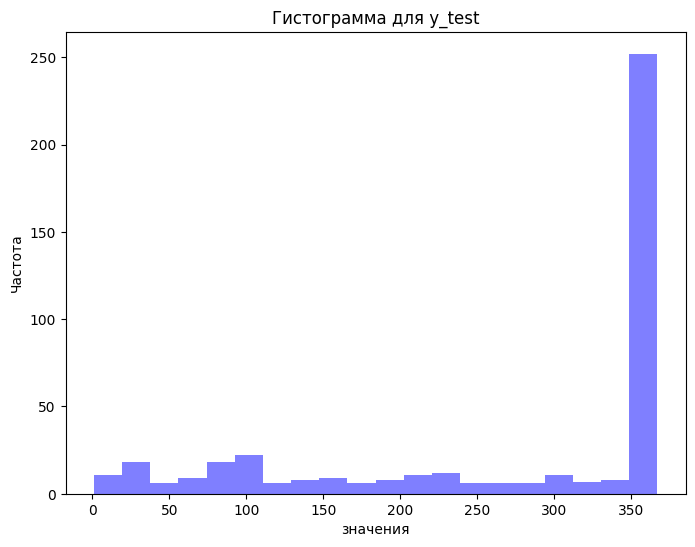

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram for the first column of X_test (change the column index as needed)
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=20, alpha=0.5, color='blue')
plt.xlabel('значения')
plt.ylabel('Частота')
plt.title('Гистограмма для y_test')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(y_train)

0         7.0
2        17.0
3        10.0
4         2.0
5         8.0
        ...  
2192    367.0
2193    367.0
2194    367.0
2198    367.0
2199    367.0
Name: quality_of_education, Length: 1760, dtype: float64


In [ ]:
# MSE
# m_test - y_true, reg.predict(N_test) - y_pred
from sklearn.metrics import mean_squared_error #средний квадрат ошибки
print("MSE =", mean_squared_error(y_test,reg.predict(X_test)))
#средний квадрат ошибки
from sklearn.metrics import r2_score # стандартный коэффициент детерминации для выбора модели
print("r2_score =",r2_score(y_test, reg.predict(X_test)))

MSE = 5140.326615611517
r2_score = 0.649367397674793


In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=0,max_depth = 3).fit(X_train, y_train)
print(y_train)

0         7.0
2        17.0
3        10.0
4         2.0
5         8.0
        ...  
2192    367.0
2193    367.0
2194    367.0
2198    367.0
2199    367.0
Name: quality_of_education, Length: 1760, dtype: float64


In [ ]:
# MSE
# m_test - y_true, reg.predict(N_test) - y_pred
from sklearn.metrics import mean_squared_error #средний квадрат ошибки
print("MSE =", mean_squared_error(y_test,reg.predict(X_test)))
#средний квадрат ошибки
from sklearn.metrics import r2_score # стандартный коэффициент детерминации для выбора модели
print("r2_score =",r2_score(y_test, reg.predict(X_test)))

MSE = 5357.064545489989
r2_score = 0.6345832428809977


#Самостоятельно программно реализовать по крайней мере один из алгоритмов построения деревьев решений (ID3, C4.5, C5.0, CART).

In [ ]:
import pandas as pd
import math
from graphviz import Digraph

TARGET_COLUMN = 'os'


In [ ]:
data = pd.read_csv("editor_corrected.csv")
train = data.iloc[:14]
test = data.iloc[14:]
train

,editor,lang,drink,os
0,jupyter,Kotlin,coffee,windows
1,jupyter,Python,tea,mac
2,jupyter,Python,tea,mac
3,jupyter,Python,coffee,mac
4,jupyter,Python,coffee,mac
5,jupyter,Python,coffee,windows
6,vim,Python,tea,unix
7,jupyter,Python,coffee,windows
8,AndroidStudio,Kotlin,tea,windows
9,jupyter,Python,tea,windows


Алгоритм ID3

In [ ]:
class Node(object): # создание узла дерева
    """
    Простое дерево
    """
    def __init__(self):
        self.value = None
        self.edge = None # Название ребра, которое ведёт в данный узел
        self.childs = []

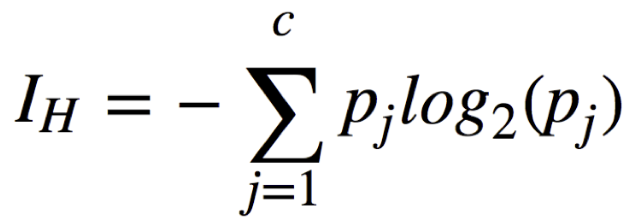

In [ ]:
def getEntropy(counts):
    """
    Вычисление энтропии по последовательности с количествами различных классов
    """
    entropy = 0
    n = sum(counts) #  сумма всех значений колонки os (TARGET_COLUMN), counts -массив всех значений целевой переменной
    for cnt in counts:
        if cnt != 0:
            entropy += -cnt/n * math.log(cnt/n, 2) # допустим cnt - количество windows, n-общая сумма. и умножаем на саму вероятность на двоичный логарифм

    return entropy

def getInformationGain(dataset, target_name, attr_name):
    """
    Вычисление information gain для конкретного атрибута
    """
    counts = dataset[target_name].value_counts() # получаем столбец os с их количеством
    n = sum(counts) # суммируем их все
    entropy = getEntropy(counts) # считаем энтропию по вершине

    values = dataset[attr_name].unique() #  считаем все уникальные значения
    av_info_entropy = 0

    for value in values: # для уникальных значений перебираем их
        partitioned = dataset[dataset[attr_name]==value] #  выборка всех значений (по атрибутам делаем выборку по атрибуту), всделали выборку где только python или kotlink
        attr_entropy = getEntropy(partitioned[target_name].value_counts()) #  считаем энтропию после разбиения по атрибуту(по python, kotlink и так далее) только для финального столбца, для os
        av_info_entropy += (partitioned.shape[0]/n) * attr_entropy

    return entropy - av_info_entropy # разницу между изначальной и полученной после разбиения энтропии

def getAttributeMaxInformationGain(dataset, target_name, attributes): # функция находит лучшее разбиение после элементарного разбиения(разбиение по одному атрибуту)
    """
    Вычисление атрибута с максимальным приростом информации
    """
    attributes = [attr for attr in dataset if attr != target_name] # проходимся по каждому атрибуту и смотрим где разница будет самая большая(разница, которую мы получили в getInformationGain)
    gains = [getInformationGain(dataset, target_name, attr_name) for attr_name in attributes]
    return attributes[gains.index(max(gains))]

def getID3Tree(iteration, dataset, target_name, attributes, root=Node()):
    """
    Функция генерации ID3 дерева
    """
    if iteration > 100:
        print(dataset)
        print(attributes)
        return

    if dataset[target_name].nunique() == 1:
        root.value = dataset[target_name].unique()[0]
        return root
    if len(attributes) == 0:
        root.value = dataset[target_name].value_counts().idxmax()
        return root

    bestAttrName = getAttributeMaxInformationGain(dataset, target_name, attributes)
    root.value = bestAttrName

    attr_values = dataset[bestAttrName].unique()

    for value in attr_values:
        child_node = Node()
        child_node.edge = value
        root.childs.append(child_node)
        childDataSet = dataset[dataset[bestAttrName]==value]

        if childDataSet.shape[0] == 0:
            child.value = dataset[target_name].value_counts().idxmax()
        else:
            next_lev_attrs = [attr for attr in attributes if attr != bestAttrName]
            getID3Tree(iteration + 1, childDataSet, target_name, next_lev_attrs, child_node)

    return root


In [ ]:
attributes = [attr for attr in data.columns if attr != TARGET_COLUMN]
root = getID3Tree(0, train, TARGET_COLUMN, attributes)
root


In [ ]:
data.head(5)

,editor,lang,drink,os
0,jupyter,Kotlin,coffee,windows
1,jupyter,Python,tea,mac
2,jupyter,Python,tea,mac
3,jupyter,Python,coffee,mac
4,jupyter,Python,coffee,mac


In [ ]:
print(test)

      editor lang   drink       os
14  vsstudio  c++     tea  windows
15  vsstudio   c#  coffee     unix
16  vsstudio  c++  coffee  windows
17  vsstudio  c++     tea     unix
18   pycharm    c     tea  windows


In [ ]:
from sklearn.metrics import accuracy_score

# Функция для предсказания на основе дерева
def predict_tree(tree, sample):
    if not tree.childs:
        return tree.value

    attr_value = sample[tree.value]

    for child in tree.childs:
        if child.edge == attr_value:
            return predict_tree(child, sample)

    # Если не найдено соответствие, возвращаем значение столбца OS текущего узла
    return sample['os']


# Проверка точности на тестовых данных

predictions = test.apply(lambda x: predict_tree(root, x), axis=1) #применяет функцию predict_tree к каждой строке (axis=1) в тестовом наборе данных (test)
print("predictions\n", predictions)

predictions
 14    windows
15       unix
16    windows
17       unix
18    windows
dtype: object


In [ ]:
print( test['os'])

14    windows
15       unix
16    windows
17       unix
18    windows
Name: os, dtype: object


In [ ]:
accuracy = accuracy_score(test[TARGET_COLUMN], predictions)

print("Accuracy:", accuracy)

Accuracy: 1.0
